In [1]:
from find_and_judge import *

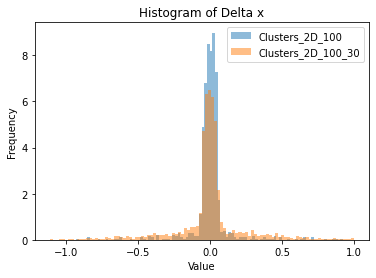

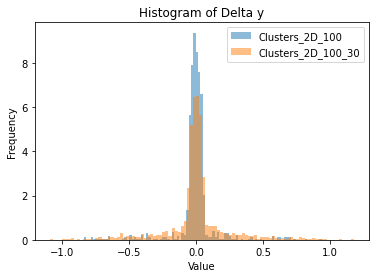

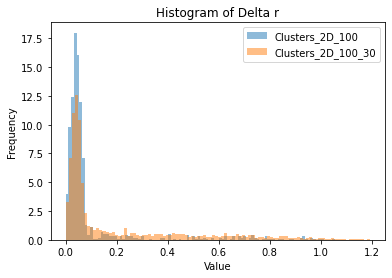

In [2]:
'''
algorithms: 'local maxima', 'local maxima denoised', 'local maxima denoised double', 
'hr local maxima denoised', 'hr local maxima denoised double'
'''
images = read_in_data('./Clusters_2D_100.txt')
found = find_points(images, 'local maxima denoised', 2)
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
found_30 = find_points(images_30, 'local maxima denoised', 2)
result2 = judge(images_30, found_30)
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

Image 7 Raw Data
Not Found: (7, 5)
[[ 854. 1175. 1254.  704.  192.]
 [3397. 3693. 3790. 2230.  533.]
 [4932. 4867. 4561. 2644.  638.]
 [2857. 2550. 2253. 1212.  288.]
 [ 683.  514.  428.  215.   53.]]


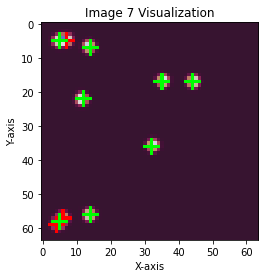

Image 34 Raw Data
Not Found: (30, 27)
[[2214. 4343. 3267.  973.  116.]
 [1717. 4065. 3814. 1460.  240.]
 [1516. 3859. 3878. 1605.  306.]
 [ 692. 1756. 1880.  776.  121.]
 [ 131.  362.  372.  133.   26.]]


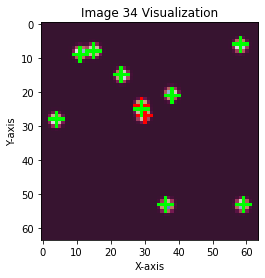

Image 49 Raw Data
Not Found: (48, 17)
[[  31.  192.  444.  380.  122.]
 [ 227.  959. 2078. 1782.  676.]
 [ 964. 2443. 4249. 3563. 1311.]
 [2707. 4111. 4405. 3066. 1039.]
 [3834. 4533. 2725. 1185.  331.]]


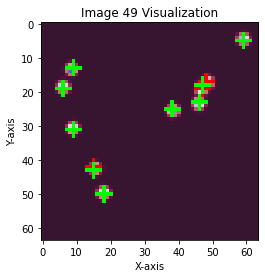

In [3]:
result1.show_error(images, found)

Image 1 Raw Data
Not Found: (55, 6)
[[  22.  122.  297.  214.   83.]
 [ 135.  752. 1648. 1515.  579.]
 [ 306. 1739. 3839. 3771. 1918.]
 [ 306. 1644. 3748. 4408. 3823.]
 [ 114.  629. 1753. 3214. 4741.]]


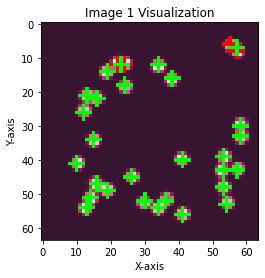

Image 6 Raw Data
Not Found: (25, 30)
[[ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]
 [6788. 4932. 4043. 1759.  379.]
 [3403. 1945. 1356.  581.   85.]]


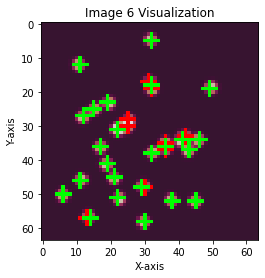

Image 6 Raw Data
Not Found: (25, 28)
[[  33.  129.  296.  270.   91.]
 [ 149.  787. 1692. 1483.  557.]
 [ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]]


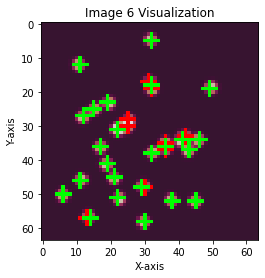

Image 7 Raw Data
Not Found: (20, 54)
[[6188. 5693. 3841. 1848.  574.]
 [4391. 4767. 5129. 3730. 1365.]
 [1366. 2299. 4012. 3695. 1423.]
 [ 226.  766. 1560. 1577.  577.]
 [  21.  113.  274.  245.  100.]]


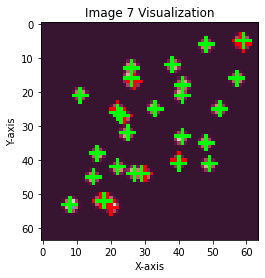

Image 8 Raw Data
Not Found: (48, 28)
[[1087. 1108.  922.  427.   87.]
 [4571. 4228. 3486. 1549.  317.]
 [8552. 7325. 5042. 2181.  391.]
 [7362. 5437. 3128. 1280.  252.]
 [3293. 2674. 1535.  527.   86.]]


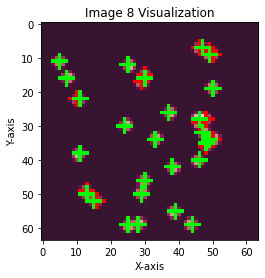

Image 11 Raw Data
Not Found: (45, 42)
[[  16.  114.  253.  247.   93.]
 [ 133.  699. 1570. 1472.  580.]
 [ 327. 1742. 4041. 3934. 1937.]
 [ 334. 2073. 5088. 5777. 4079.]
 [ 207. 1624. 4549. 6445. 6016.]]


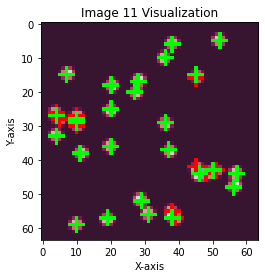

Image 11 Raw Data
Not Found: (38, 55)
[[ 188.  493.  548.  247.   59.]
 [ 732. 2119. 2481. 1071.  252.]
 [1310. 3800. 4433. 2360.  567.]
 [ 898. 3048. 4460. 3655. 1432.]
 [ 348. 1545. 3883. 4572. 2398.]]


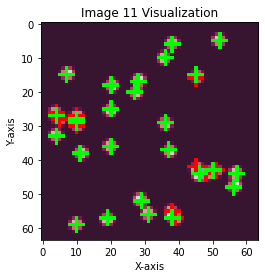

Image 11 Raw Data
Not Found: (48, 44)
[[3934. 1937.  869. 1026. 2037.]
 [5777. 4079. 3193. 2637. 4047.]
 [6445. 6016. 4932. 3323. 3253.]
 [4298. 4120. 3274. 1830. 1120.]
 [1353. 1164.  868.  435.  146.]]


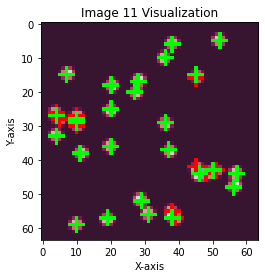

Image 18 Raw Data
Not Found: (33, 36)
[[6863. 9362. 5435. 1437.  179.]
 [5580. 8049. 5537. 1999.  340.]
 [3465. 6187. 5611. 2444.  473.]
 [1226. 2647. 3077. 1454.  299.]
 [ 208.  574.  730.  373.   89.]]


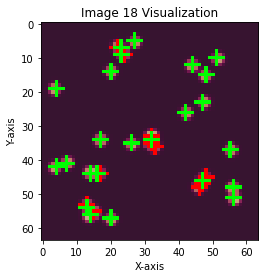

Image 18 Raw Data
Not Found: (46, 48)
[[ 283. 1576. 4319. 6576. 5090.]
 [ 844. 3262. 6323. 6522. 3446.]
 [1171. 3871. 5678. 4428. 1670.]
 [ 660. 2087. 2766. 1674.  486.]
 [ 136.  444.  590.  340.   59.]]


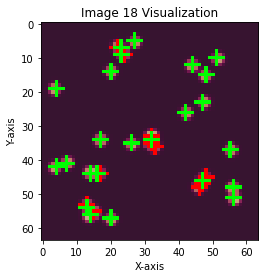

Image 29 Raw Data
Not Found: (37, 50)
[[ 240.  608.  780.  316.   47.]
 [1458. 2721. 2717. 1086.  181.]
 [3801. 5010. 4475. 1770.  278.]
 [5278. 4735. 2995. 1116.  195.]
 [3293. 2351.  946.  305.   39.]]


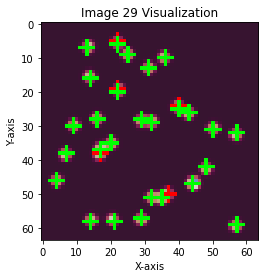

Image 30 Raw Data
Not Found: (5, 12)
[[ 264. 1568. 3987. 4709. 2352.]
 [ 714. 2590. 4598. 3972. 1631.]
 [ 971. 3226. 4593. 2868. 1106.]
 [ 528. 1962. 2703. 1531.  720.]
 [ 137.  465.  646.  312.  203.]]


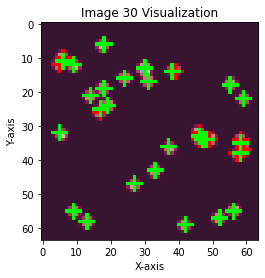

Image 31 Raw Data
Not Found: (54, 25)
[[1007.  578.  790.  592.  175.]
 [ 808. 1802. 2954. 2161.  634.]
 [2624. 3689. 4697. 3136.  948.]
 [6593. 5740. 3840. 2006.  563.]
 [8257. 5985. 2167.  606.  147.]]


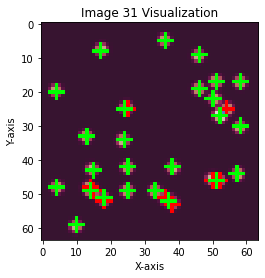

Image 35 Raw Data
Not Found: (55, 7)
[[  88.  276.  358.  190.   44.]
 [ 446. 1477. 1965. 1007.  192.]
 [1079. 3280. 4278. 2262.  462.]
 [1540. 3909. 4599. 2569.  754.]
 [2298. 4667. 5082. 3545. 1769.]]


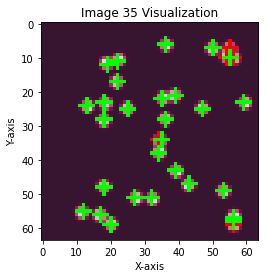

Image 39 Raw Data
Not Found: (55, 15)
[[  94.  301.  346.  174.   40.]
 [ 469. 1591. 1906.  992.  206.]
 [1355. 3578. 4206. 2299.  592.]
 [2477. 4574. 4906. 3309. 1480.]
 [4048. 5014. 4633. 4695. 3002.]]


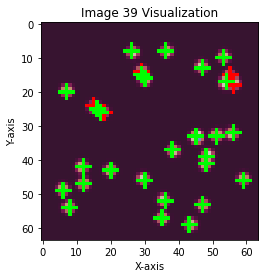

Image 39 Raw Data
Not Found: (56, 18)
[[4574. 4906. 3309. 1480.  327.]
 [5014. 4633. 4695. 3002.  799.]
 [3869. 3643. 4127. 2908.  869.]
 [1393. 1336. 1676. 1126.  333.]
 [ 198.  209.  241.  190.   54.]]


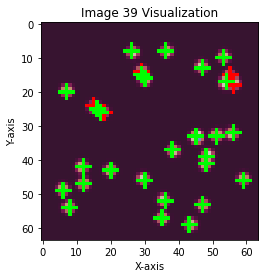

Image 43 Raw Data
Not Found: (39, 28)
[[ 219.  379.  791. 1114. 1873.]
 [ 464. 1674. 3047. 4111. 5883.]
 [ 669. 2743. 4889. 5921. 7497.]
 [ 425. 1875. 3340. 3558. 3779.]
 [ 138.  500.  876.  890.  822.]]


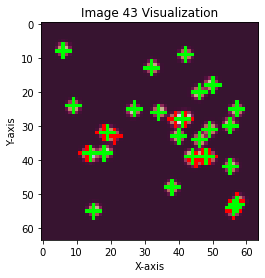

Image 47 Raw Data
Not Found: (35, 27)
[[2951. 4510. 3287. 1168.  193.]
 [1773. 3800. 4364. 2183.  437.]
 [ 973. 3185. 4305. 2409.  558.]
 [ 383. 1462. 2076. 1137.  260.]
 [  85.  275.  383.  221.   63.]]


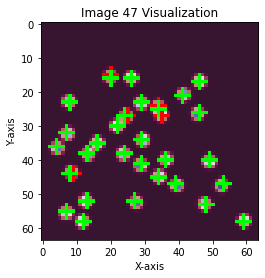

Image 50 Raw Data
Not Found: (32, 56)
[[ 393.  317.  323.  206.   94.]
 [2217. 1961. 1846. 1199.  415.]
 [4590. 4449. 4350. 2875.  787.]
 [4041. 3931. 4286. 2811.  790.]
 [1361. 1521. 1541. 1020.  322.]]


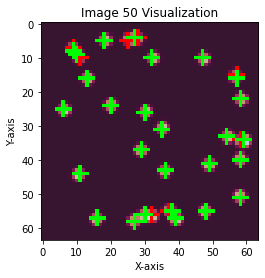

Image 50 Raw Data
Not Found: (25, 5)
[[ 137.  754. 1541. 1704. 1809.]
 [ 339. 1844. 3983. 4092. 4313.]
 [ 389. 1905. 3920. 3985. 3911.]
 [ 147.  762. 1558. 1606. 1431.]
 [  20.  115.  233.  240.  202.]]


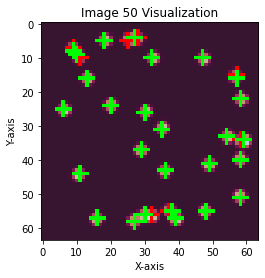

Image 52 Raw Data
Not Found: (52, 13)
[[ 101.  324.  434.  221.   41.]
 [ 517. 1677. 2029. 1049.  216.]
 [1136. 3440. 4376. 2105.  386.]
 [1554. 4124. 4682. 2328.  426.]
 [2784. 5882. 5633. 2370.  423.]]


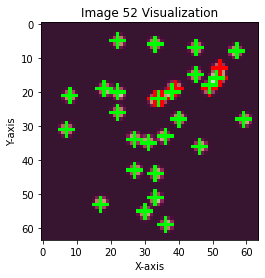

Image 53 Raw Data
Not Found: (30, 33)
[[  91.  588. 1283. 1830. 2775.]
 [ 298. 1557. 3609. 4227. 4376.]
 [ 341. 1757. 3979. 4010. 3046.]
 [ 181.  814. 1714. 1650.  957.]
 [ 147.  170.  336.  280.  169.]]


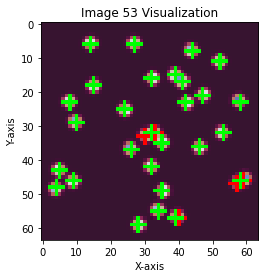

Image 60 Raw Data
Not Found: (49, 20)
[[ 213.  919. 1468.  993.  310.]
 [ 558. 2364. 3955. 2745.  900.]
 [ 634. 2500. 4326. 3591. 1880.]
 [ 264. 1269. 3189. 4433. 3318.]
 [  80.  577. 2243. 4295. 3644.]]


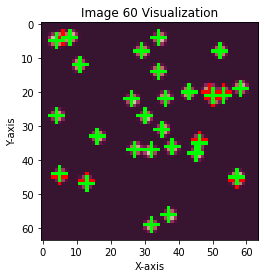

Image 62 Raw Data
Not Found: (49, 54)
[[  54.  236.  401.  261.   99.]
 [ 296. 1241. 2053. 1368.  591.]
 [ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]]


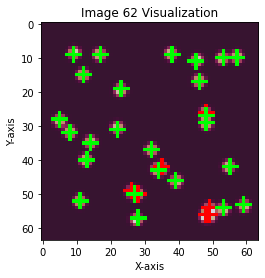

Image 62 Raw Data
Not Found: (48, 56)
[[ 129.  882. 3085. 4801. 3071.]
 [ 411. 2049. 5053. 6303. 3910.]
 [ 866. 3743. 7437. 7437. 3835.]
 [ 815. 3349. 6201. 5876. 2796.]
 [ 296. 1129. 2197. 2022.  959.]]


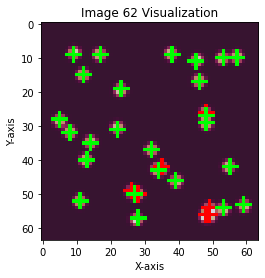

Image 62 Raw Data
Not Found: (49, 56)
[[ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]
 [3349. 6201. 5876. 2796.  642.]
 [1129. 2197. 2022.  959.  219.]]


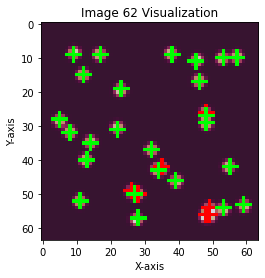

Image 65 Raw Data
Not Found: (51, 48)
[[  35.  187.  503. 1178. 2465.]
 [ 228. 1138. 2362. 3574. 5225.]
 [ 496. 2371. 5101. 6585. 6777.]
 [ 470. 2095. 4685. 6068. 5561.]
 [ 170.  792. 1747. 2662. 2669.]]


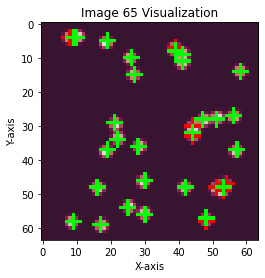

Image 73 Raw Data
Not Found: (58, 11)
[[ 512. 1350. 1673.  739.  159.]
 [1499. 3427. 3773. 1771.  332.]
 [3350. 4736. 4285. 1888.  337.]
 [5204. 4330. 2364.  847.  132.]
 [4258. 2685.  922.  195.   22.]]


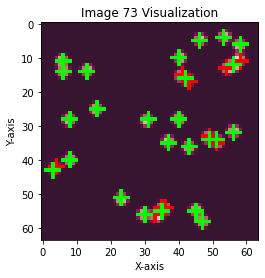

Image 73 Raw Data
Not Found: (54, 13)
[[  74.  335.  895. 1816. 3350.]
 [ 316. 1463. 3056. 4230. 5204.]
 [ 560. 2486. 4762. 5037. 4258.]
 [ 335. 1578. 3063. 2720. 1641.]
 [  93.  421.  784.  629.  328.]]


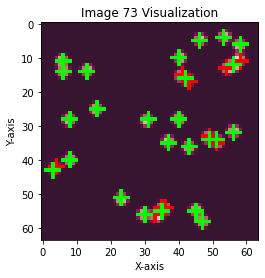

Image 73 Raw Data
Not Found: (33, 56)
[[ 385.  221.  779. 3468. 7370.]
 [1380. 1036. 1992. 3982. 6616.]
 [2267. 1966. 3820. 4377. 3180.]
 [1428. 1774. 3564. 3333. 1416.]
 [ 375.  638. 1363. 1245.  481.]]


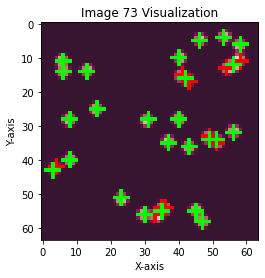

Image 74 Raw Data
Not Found: (31, 14)
[[  87.  225.  430.  337.  154.]
 [ 680. 1262. 2108. 1788.  802.]
 [2802. 3558. 4446. 3726. 2343.]
 [4589. 4481. 4114. 3523. 3640.]
 [3172. 2664. 1670. 1566. 2738.]]


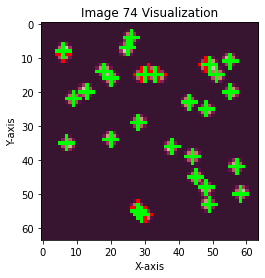

Image 77 Raw Data
Not Found: (16, 6)
[[  74.  456. 1157. 1192.  479.]
 [ 233. 1322. 3314. 3212. 1314.]
 [ 224. 1421. 3697. 3697. 1406.]
 [ 113.  683. 1706. 1609.  646.]
 [ 186.  406.  505.  388.  133.]]


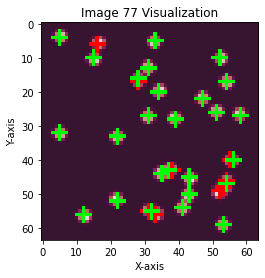

Image 77 Raw Data
Not Found: (52, 49)
[[  85.  506. 2168. 5361. 6235.]
 [ 420. 1608. 3828. 5926. 5050.]
 [1009. 3215. 5128. 4764. 2917.]
 [ 890. 2995. 4080. 2538.  853.]
 [ 342. 1141. 1433.  745.  183.]]


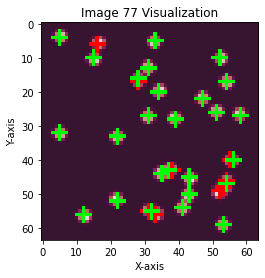

Image 78 Raw Data
Not Found: (18, 48)
[[ 148.  429.  651.  482.  125.]
 [ 996. 2049. 2734. 1970.  555.]
 [3409. 4491. 5026. 3171.  923.]
 [6362. 5693. 3983. 2250.  592.]
 [6734. 4344. 1705.  609.  162.]]


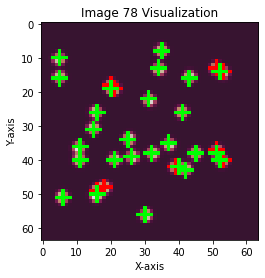

Image 78 Raw Data
Not Found: (53, 14)
[[2342. 1566.  561.  204.   45.]
 [4674. 3659. 2282. 1057.  237.]
 [3808. 4526. 4499. 2417.  560.]
 [1586. 3111. 3970. 2320.  551.]
 [ 362.  990. 1485.  933.  225.]]


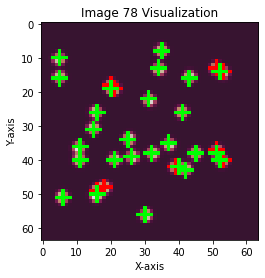

Image 80 Raw Data
Not Found: (55, 41)
[[ 207.  648.  763.  418.   71.]
 [ 812. 2367. 2870. 1445.  279.]
 [1170. 3772. 4701. 2471.  528.]
 [ 919. 3232. 4868. 3058.  852.]
 [ 577. 2597. 4911. 3500. 1142.]]


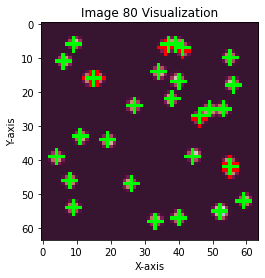

Image 82 Raw Data
Not Found: (49, 51)
[[ 143.  428.  563.  266.   58.]
 [ 796. 2046. 2495. 1324.  294.]
 [2522. 4094. 4323. 2314.  434.]
 [4638. 4403. 3519. 1557.  311.]
 [4128. 2646. 1235.  452.  134.]]


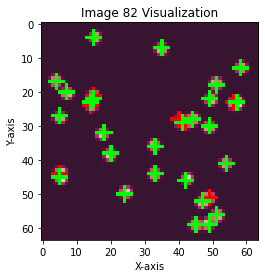

Image 86 Raw Data
Not Found: (43, 32)
[[  64.  303.  704.  769.  644.]
 [ 157. 1082. 2731. 2667. 1377.]
 [ 250. 1607. 4039. 4439. 3024.]
 [ 210. 1185. 3304. 4674. 5710.]
 [ 606. 1386. 3363. 6567. 8464.]]


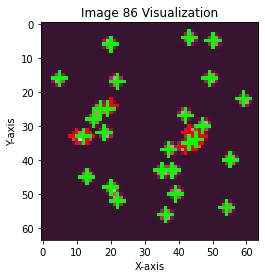

Image 89 Raw Data
Not Found: (59, 50)
[[ 620. 2767. 4750. 3334.  941.]
 [ 548. 2555. 4594. 3236.  951.]
 [ 549. 2569. 4583. 3514. 1013.]
 [ 315. 1531. 2845. 2121.  677.]
 [  73.  366.  744.  562.  162.]]


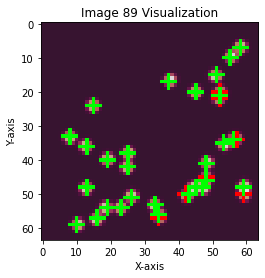

Image 90 Raw Data
Not Found: (21, 6)
[[ 227.  573.  652.  260.   40.]
 [ 891. 2364. 2546. 1080.  195.]
 [1506. 3969. 4393. 1955.  343.]
 [1305. 3736. 4628. 2256.  454.]
 [ 955. 3503. 4859. 2709.  648.]]


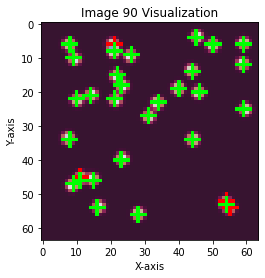

Image 91 Raw Data
Not Found: (33, 38)
[[1531. 5581. 8140. 4964. 1183.]
 [ 985. 3952. 6135. 4100. 1073.]
 [ 509. 2426. 5023. 4093. 1349.]
 [ 310. 1660. 3620. 3351. 1179.]
 [  95.  558. 1238. 1177.  409.]]


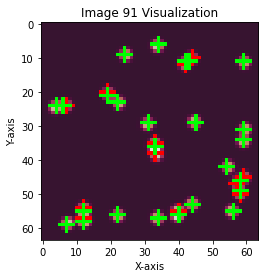

Image 94 Raw Data
Not Found: (4, 33)
[[ 970. 4098. 7617. 6012. 2138.]
 [1269. 4832. 7087. 4529. 1131.]
 [1196. 3894. 5108. 2558.  590.]
 [ 505. 1656. 2057. 1036.  218.]
 [  83.  327.  363.  170.   42.]]


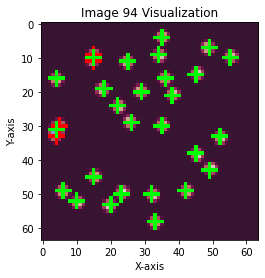

Image 98 Raw Data
Not Found: (22, 11)
[[ 173.  434.  429.  188.   37.]
 [ 776. 1995. 2055.  858.  139.]
 [1535. 3963. 4079. 1714.  300.]
 [1431. 3671. 4183. 1872.  321.]
 [1202. 3481. 4402. 2246.  445.]]


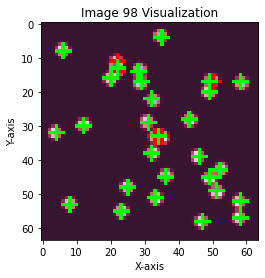

In [4]:
result2.show_error(images_30, found_30)

Processing image  0 ...
Processing image  1 ...
Processing image  2 ...
Processing image  3 ...
Processing image  4 ...
Processing image  5 ...
Processing image  6 ...
Processing image  7 ...
Processing image  8 ...
Processing image  9 ...
Processing image  10 ...
Processing image  11 ...
Processing image  12 ...
Processing image  13 ...
Processing image  14 ...
Processing image  15 ...
Processing image  16 ...
Processing image  17 ...
Processing image  18 ...
Processing image  19 ...
Processing image  20 ...
Processing image  21 ...
Processing image  22 ...
Processing image  23 ...
Processing image  24 ...
Processing image  25 ...
Processing image  26 ...
Processing image  27 ...
Processing image  28 ...
Processing image  29 ...
Processing image  30 ...
Processing image  31 ...
Processing image  32 ...
Processing image  33 ...
Processing image  34 ...
Processing image  35 ...
Processing image  36 ...
Processing image  37 ...
Processing image  38 ...
Processing image  39 ...
Processing

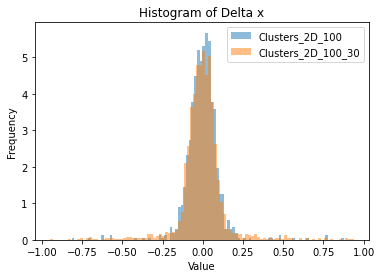

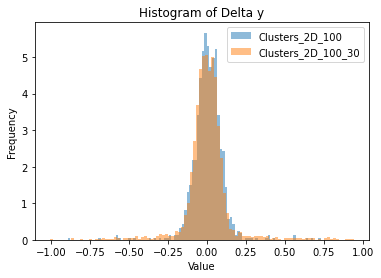

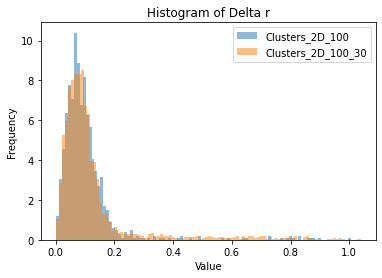

In [5]:
'''
algorithms: 'local maxima', 'local maxima denoised', 'local maxima denoised double', 
'hr local maxima denoised', 'hr local maxima denoised double'
'''
images = read_in_data('./Clusters_2D_100.txt')
hr_found = find_points(images, 'hr local maxima denoised', 2)
hr_result1 = judge(images, hr_found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
hr_found_30 = find_points(images_30, 'hr local maxima denoised', 2)
hr_result2 = judge(images_30, hr_found_30)
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(hr_result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(hr_result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(hr_result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(hr_result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

In [6]:
hr_result1.show_error(images, hr_found)

None


Image 6 Raw Data
Not Found: (25, 30)
[[ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]
 [6788. 4932. 4043. 1759.  379.]
 [3403. 1945. 1356.  581.   85.]]


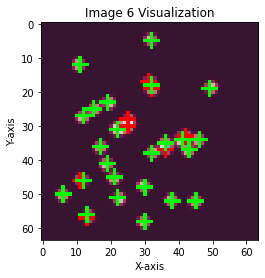

Image 6 Raw Data
Not Found: (25, 28)
[[  33.  129.  296.  270.   91.]
 [ 149.  787. 1692. 1483.  557.]
 [ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]]


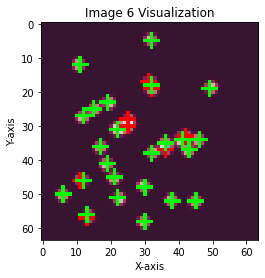

Image 8 Raw Data
Not Found: (48, 28)
[[1087. 1108.  922.  427.   87.]
 [4571. 4228. 3486. 1549.  317.]
 [8552. 7325. 5042. 2181.  391.]
 [7362. 5437. 3128. 1280.  252.]
 [3293. 2674. 1535.  527.   86.]]


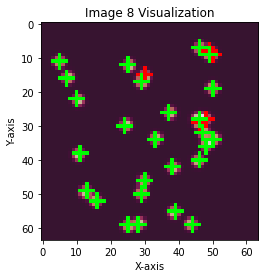

Image 11 Raw Data
Not Found: (45, 42)
[[  16.  114.  253.  247.   93.]
 [ 133.  699. 1570. 1472.  580.]
 [ 327. 1742. 4041. 3934. 1937.]
 [ 334. 2073. 5088. 5777. 4079.]
 [ 207. 1624. 4549. 6445. 6016.]]


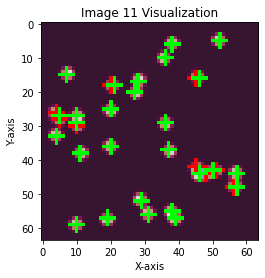

Image 11 Raw Data
Not Found: (4, 26)
[[ 129.  408.  433.  185.   30.]
 [ 684. 1901. 2218. 1034.  212.]
 [1417. 3944. 4626. 2687.  861.]
 [1022. 3451. 5282. 4719. 2078.]
 [ 391. 1765. 3872. 4762. 2497.]]


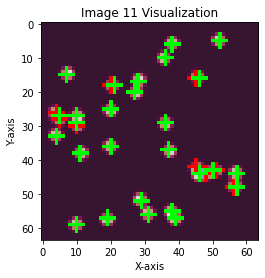

Image 11 Raw Data
Not Found: (48, 44)
[[3934. 1937.  869. 1026. 2037.]
 [5777. 4079. 3193. 2637. 4047.]
 [6445. 6016. 4932. 3323. 3253.]
 [4298. 4120. 3274. 1830. 1120.]
 [1353. 1164.  868.  435.  146.]]


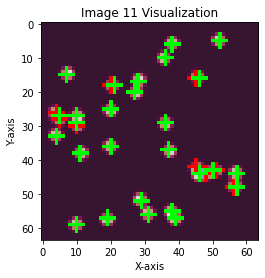

Image 18 Raw Data
Not Found: (33, 36)
[[6863. 9362. 5435. 1437.  179.]
 [5580. 8049. 5537. 1999.  340.]
 [3465. 6187. 5611. 2444.  473.]
 [1226. 2647. 3077. 1454.  299.]
 [ 208.  574.  730.  373.   89.]]


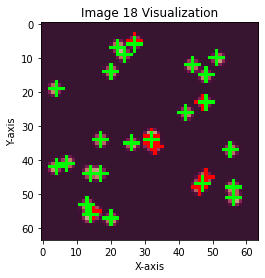

Image 18 Raw Data
Not Found: (48, 45)
[[ 120.  377.  393.  182.   38.]
 [ 790. 2008. 2102.  937.  153.]
 [2192. 4753. 4635. 1841.  285.]
 [4319. 6576. 5090. 1719.  285.]
 [6323. 6522. 3446.  930.  116.]]


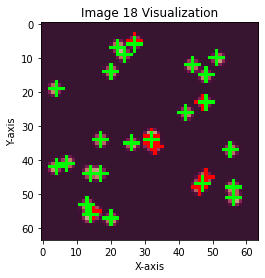

Image 34 Raw Data
Not Found: (12, 7)
[[1415. 4143. 4764. 2262.  398.]
 [1618. 4399. 4813. 2066.  372.]
 [1689. 4303. 4469. 1884.  260.]
 [1072. 2754. 2779. 1106.  186.]
 [ 287.  765.  727.  297.   53.]]


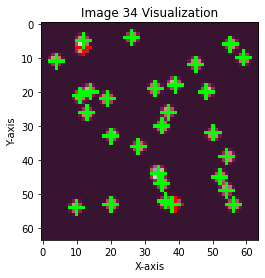

Image 38 Raw Data
Not Found: (59, 37)
[[ 206.  248.  518.  494.  175.]
 [ 579. 1218. 2442. 2160.  733.]
 [1417. 3421. 5560. 4460. 1472.]
 [3049. 6488. 7847. 5005. 1515.]
 [3474. 7081. 7480. 4257. 1137.]]


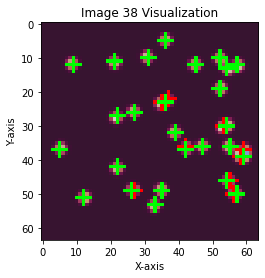

Image 43 Raw Data
Not Found: (39, 28)
[[ 219.  379.  791. 1114. 1873.]
 [ 464. 1674. 3047. 4111. 5883.]
 [ 669. 2743. 4889. 5921. 7497.]
 [ 425. 1875. 3340. 3558. 3779.]
 [ 138.  500.  876.  890.  822.]]


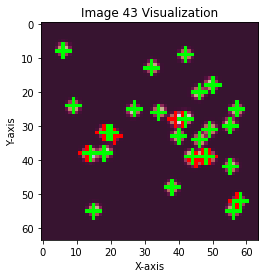

Image 45 Raw Data
Not Found: (23, 15)
[[1328. 2855. 2493. 1126.  516.]
 [ 746. 1947. 2576. 2750. 2298.]
 [ 991. 3336. 5194. 5879. 5261.]
 [1005. 3287. 5337. 7086. 6613.]
 [ 399. 1336. 2764. 4940. 5548.]]


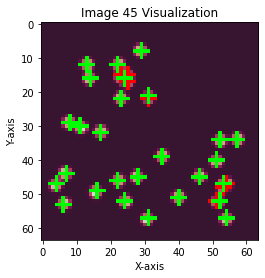

Image 55 Raw Data
Not Found: (21, 24)
[[ 133.  704. 2145. 4225. 4050.]
 [ 440. 2043. 4094. 5019. 3849.]
 [ 625. 2706. 4657. 3895. 2013.]
 [ 368. 1599. 2658. 1780.  763.]
 [  85.  392.  601.  411.  226.]]


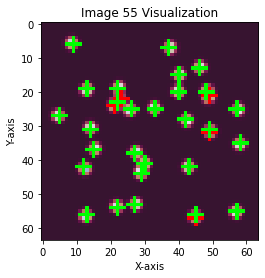

Image 62 Raw Data
Not Found: (49, 54)
[[  54.  236.  401.  261.   99.]
 [ 296. 1241. 2053. 1368.  591.]
 [ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]]


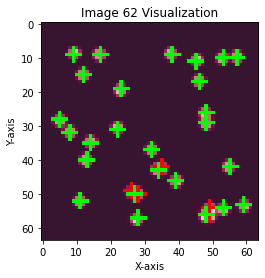

Image 63 Raw Data
Not Found: (12, 42)
[[ 196. 1163. 3047. 3697. 2200.]
 [ 721. 2853. 6150. 7536. 4988.]
 [1473. 4405. 7071. 7637. 5247.]
 [1351. 3758. 4800. 3942. 2557.]
 [ 524. 1324. 1692. 1038.  512.]]


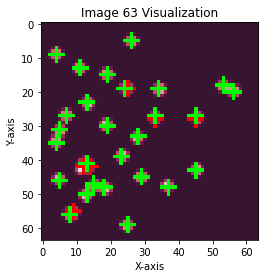

Image 64 Raw Data
Not Found: (8, 13)
[[ 273.  856.  986.  456.  104.]
 [ 991. 2983. 3608. 1666.  403.]
 [1526. 4650. 6313. 3958. 1386.]
 [1294. 4676. 7833. 6842. 3310.]
 [ 755. 3186. 6354. 6899. 4015.]]


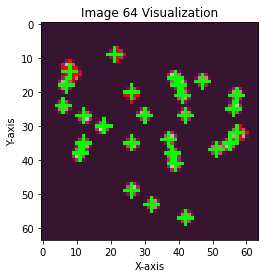

Image 65 Raw Data
Not Found: (54, 47)
[[ 202.  479.  475.  220.   34.]
 [1178. 2465. 2243.  887.  135.]
 [3574. 5225. 4353. 1754.  243.]
 [6585. 6777. 4518. 1447.  191.]
 [6068. 5561. 3009.  750.   94.]]


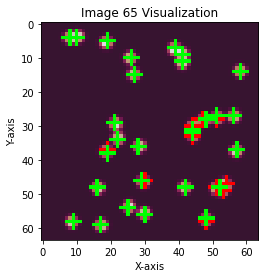

Image 77 Raw Data
Not Found: (52, 49)
[[  85.  506. 2168. 5361. 6235.]
 [ 420. 1608. 3828. 5926. 5050.]
 [1009. 3215. 5128. 4764. 2917.]
 [ 890. 2995. 4080. 2538.  853.]
 [ 342. 1141. 1433.  745.  183.]]


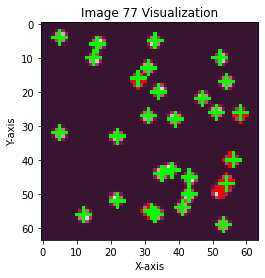

Image 80 Raw Data
Not Found: (14, 16)
[[ 144.  466.  777.  703.  615.]
 [ 567. 1880. 3174. 3178. 2867.]
 [ 899. 3150. 4964. 5345. 5082.]
 [ 570. 2082. 3398. 3534. 3344.]
 [ 155.  571.  891.  932.  976.]]


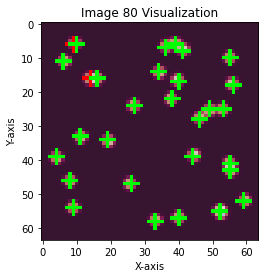

Image 94 Raw Data
Not Found: (4, 33)
[[ 970. 4098. 7617. 6012. 2138.]
 [1269. 4832. 7087. 4529. 1131.]
 [1196. 3894. 5108. 2558.  590.]
 [ 505. 1656. 2057. 1036.  218.]
 [  83.  327.  363.  170.   42.]]


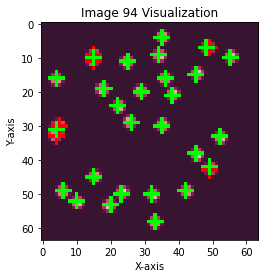

Image 97 Raw Data
Not Found: (41, 21)
[[ 265.  545.  562.  253.   51.]
 [ 923. 2470. 2460. 1042.  193.]
 [1653. 4154. 4585. 2309.  508.]
 [1106. 3623. 5213. 3591. 1143.]
 [ 516. 2243. 4792. 4135. 1517.]]


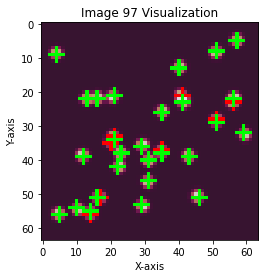

Image 99 Raw Data
Not Found: (27, 32)
[[ 157.  766. 2006. 3453. 4588.]
 [ 442. 2171. 4400. 5460. 5038.]
 [ 544. 2472. 4451. 4273. 2756.]
 [ 239. 1134. 1953. 1553.  702.]
 [  44.  201.  336.  228.   91.]]


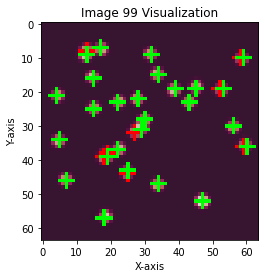

In [7]:
hr_result2.show_error(images_30, hr_found_30)